<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/tensorflow.ai/tf/b6_sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

--2020-11-19 20:26:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-11-19 20:26:51 (107 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tf.__version__

'2.3.0'

In [3]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [4]:
sentences = []
labels = []
urls = []

with open('sarcasm.json', 'r') as f:
  datastore = json.load(f)

  for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(',', ' , ')
    sentence = sentence.replace('.', ' . ')
    sentence = sentence.replace('-', ' - ')
    sentence = sentence.replace('/', ' / ')
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ''
    for word in words:
      word = word.translate(table)
      if word not in stopwords:
        filtered_sentence = filtered_sentence + word + ' '
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])


In [5]:
sentences[:3]

['former versace store clerk sues secret black code minority shoppers ',
 'roseanne revival catches thorny political mood  better worse ',
 'mom starting fear sons web series closest thing will grandchild ']

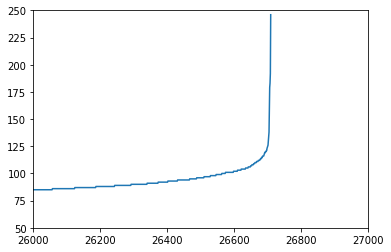

85


In [6]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

In [7]:
vocab_size = 10000
embedding_dim = 16
max_lenght = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 23000

In [8]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_lenght,     # 100
                                padding=padding_type,  # post
                                truncating=trunc_type) # post

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_lenght,     # 100
                               padding=padding_type,  # post
                               truncating=trunc_type) # post

In [10]:
wc = tokenizer.word_counts
list(wc.items())[:3]

[('former', 90), ('versace', 1), ('store', 44)]

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'not': 5, 'just': 6, 'will': 7, 'one': 8, 'year': 9, 'report': 10, 'area': 11, 'donald': 12, 'day': 13, 'u': 14, 's': 15, 'can': 16, 'says': 17, 'woman': 18, 'first': 19, 'time': 20, 'like': 21, 'no': 22, 'get': 23, 'old': 24, 'trumps': 25, 'off': 26, 'now': 27, 'life': 28, 'obama': 29, 'people': 30, 'house': 31, 'women': 32, 'white': 33, 'back': 34, 'still': 35, 'make': 36, 'clinton': 37, '5': 38, 'world': 39, 'americans': 40, 'years': 41, 'way': 42, 'family': 43, 'black': 44, 'study': 45, 'gop': 46, 'best': 47, 'bill': 48, 'american': 49, 'school': 50, 'police': 51, 'watch': 52, '3': 53, 'show': 54, 'really': 55, 'president': 56, 'home': 57, 'last': 58, 'video': 59, 'finds': 60, 'death': 61, 'cant': 62, 'know': 63, '10': 64, 'things': 65, 'good': 66, 'going': 67, 'state': 68, 'hillary': 69, 'love': 70, 'nation': 71, 'may': 72, '2': 73, 'health': 74, 'say': 75, 'parents': 76, 'big': 77, 'every': 78, 'right': 79, 'work': 80, '000': 81, 'need

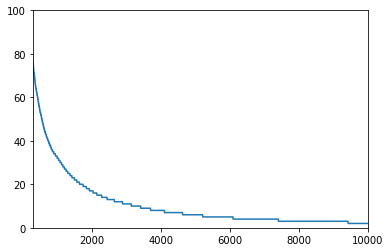

32
17


In [11]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(ys[2000])

In [12]:
print(ys[3125])
print(ys[10000])
print(ys[12156])

11
2
2


In [13]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [14]:
model = tf.keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(24, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

adam = optimizers.Adam(
    learning_rate=0.0001, 
    beta_1=0.9, 
    beta_2=0.9999,
    amsgrad=False
)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 100
history = model.fit(
    training_padded,
    training_labels,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    verbose=2
)

Epoch 1/100
719/719 - 3s - loss: 0.6880 - accuracy: 0.5596 - val_loss: 0.6835 - val_accuracy: 0.5700
Epoch 2/100
719/719 - 3s - loss: 0.6851 - accuracy: 0.5596 - val_loss: 0.6824 - val_accuracy: 0.5700
Epoch 3/100
719/719 - 3s - loss: 0.6845 - accuracy: 0.5596 - val_loss: 0.6816 - val_accuracy: 0.5700
Epoch 4/100
719/719 - 3s - loss: 0.6836 - accuracy: 0.5596 - val_loss: 0.6807 - val_accuracy: 0.5700
Epoch 5/100
719/719 - 3s - loss: 0.6824 - accuracy: 0.5596 - val_loss: 0.6793 - val_accuracy: 0.5700
Epoch 6/100
719/719 - 3s - loss: 0.6806 - accuracy: 0.5596 - val_loss: 0.6773 - val_accuracy: 0.5700
Epoch 7/100
719/719 - 3s - loss: 0.6778 - accuracy: 0.5597 - val_loss: 0.6739 - val_accuracy: 0.5700
Epoch 8/100
719/719 - 3s - loss: 0.6721 - accuracy: 0.5599 - val_loss: 0.6669 - val_accuracy: 0.5721
Epoch 9/100
719/719 - 3s - loss: 0.6610 - accuracy: 0.5681 - val_loss: 0.6547 - val_accuracy: 0.6061
Epoch 10/100
719/719 - 3s - loss: 0.6440 - accuracy: 0.6160 - val_loss: 0.6372 - val_accura

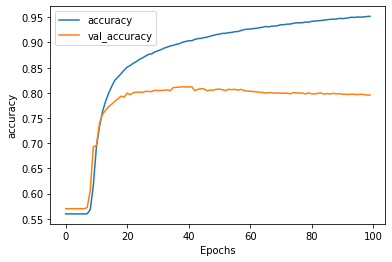

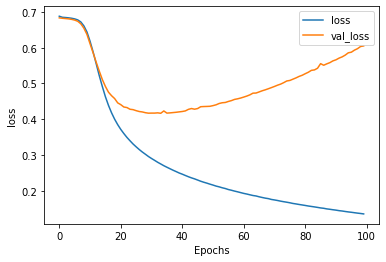

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues secret black code minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting fear sons web series closest thing will grandchild 
1


In [19]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)  # shape: (vocab_size, embedding_dim)

(10000, 16)


In [20]:
print(reverse_word_index[2])
print(weights[2])

new
[ 0.05077915  0.11054341 -0.11016547 -0.18802065 -0.18306895  0.03878636
  0.13647552 -0.03574179 -0.0926282   0.05902272  0.07292771  0.01485328
 -0.01278799 -0.08933557 -0.00256519  0.06327952]


In [21]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

## Keras TextVectorization

In [22]:
# once we have our handles, we format the datasets in a kereas-fit
# compatible format: a tuple of the form (text_data, label)
def format_dataset(input_data):
  return (input_data['headline'], input_data['is_sarcastic'])

In [23]:
data_raw = []

with open('sarcasm.json', 'r') as f:
  datastore = json.load(f)
  data_raw = [format_dataset(item) for item in datastore]
data_raw[:10]

[("former versace store clerk sues over secret 'black code' for minority shoppers",
  0),
 ("the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  0),
 ("mom starting to fear son's web series closest thing she will have to grandchild",
  1),
 ('boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  1),
 ('j.k. rowling wishes snape happy birthday in the most magical way', 0),
 ("advancing the world's women", 0),
 ('the fascinating case for eating lab-grown meat', 0),
 ('this ceo will send your kids to school, if you work for his company', 0),
 ('top snake handler leaves sinking huckabee campaign', 1),
 ("friday's morning email: inside trump's presser for the ages", 0)]

In [24]:
import string
import re

def custom_standarization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.string.regex_replace(lowercase, '<br />', ' ')
  return tf.string.regex_replace(stripped_html,
                                 '[%s]' % re.escape(string.punctuation),
                                 '')

- vocab_size = 10000
- embedding_dim = 16
- max_lenght = 100
- trunc_type = 'post'
- padding_type = 'post'
- oov_tok = '<OOV>'
- training_size = 23000

In [25]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorize_layer = TextVectorization(
    # standardize=custom_standarization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=max_lenght
)

Next, you will call `adapt` to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.

> **Note: it's important to only use your training data when calling adapt (using the test set would leak information).**

In [28]:
# pass a text-only(sentence-only) dataset (without labels), then call apdapt
vectorize_layer.adapt(training_sentences)

In [34]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [35]:
print('Vectorized sentence:', vectorize_text(
    training_sentences[0], 
    training_labels[0]))

Vectorized sentence: (<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[ 233,    1,  644, 3652, 2471,  284,   44, 1829, 2746,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])>, 0)


In [36]:
print('Vectorized sentence:', vectorize_text(
    training_sentences[1], 
    training_labels[1]))

Vectorized sentence: (<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[7868, 3216, 3373, 7607,  316, 2525,  198,  900,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])>, 0)


In [38]:
vectorize_layer.get_vocabulary()[:5]

['', '[UNK]', 'new', 'trump', 'man']